In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Conv2D,MaxPooling2D,Dense,Flatten

In [2]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')
X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
print('shape of X_train',X_train.shape)
print('shape of Y_train',Y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of Y_test',Y_test.shape)

shape of X_train (2000, 30000)
shape of Y_train (2000,)
shape of X_test (400, 30000)
shape of Y_test (400,)


In [4]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0




Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),  # Corrected: Added extra parentheses here
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.fit(X_train,Y_train, epochs =20,batch_size=64)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5182 - loss: 0.8333
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5622 - loss: 0.6899
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5855 - loss: 0.6618 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6664 - loss: 0.6148
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7108 - loss: 0.5650
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7685 - loss: 0.5285 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7502 - loss: 0.5012 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7961 - loss: 0.4439
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8383 - loss: 0.3860
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8524 - loss: 0.3537
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8802 - loss: 0.3025 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step 

In [8]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7326 - loss: 0.9969


[1.074907660484314, 0.6899999976158142]

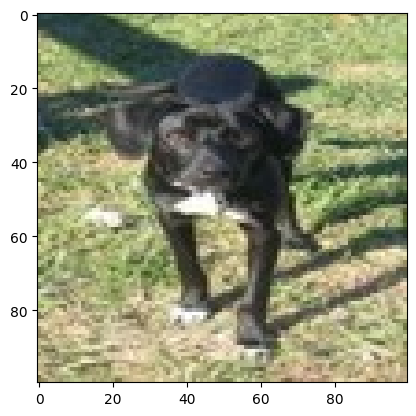

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[1.2923347e-05]]
our model says it is a: dog


In [9]:
import matplotlib.pyplot as plt
import random
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

y_pred=y_pred>0.5

if (y_pred==0):
    pred='dog'
else:
    pred='cat'
print("our model says it is a:",pred)

In [10]:
import pickle
with open('insurance_prediction.pkl', 'wb') as f:
    pickle.dump((model), f)